# Rohdatensatz explorieren

Der hier verwendete Datensatz ist von Kaggle:

"Used Cars Dataset - Vehicles listings from Craigslist.org"

URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Er ist allerdings sehr groß! Entpackt ist es eine .csv Datei mit 1.4 GB und enthält 458213 Angebote von gebrauchten Autos.

Deswegen werden wir im ersten Schritt einen kleineren handlicheren Datensatz erzeugen, in dem wir unvollständige Einträge verwerfen.

In [ ]:
import pandas as pd

In [ ]:
fname = "/home/juebrauer/link_to_vcd/12_datasets/13_craigslist_used_cars/vehicles.csv"
tabelle_gross = pd.read_csv(fname)

In [ ]:
tabelle_gross

Die Form der Daten gibt uns Auskunft über Anzahl der Zeilen und Spalten (=Merkmale pro Auto):

In [ ]:
tabelle_gross.shape

Schauen wir uns mal ein einziges Beispiel an:

In [ ]:
tabelle_gross.iloc[0]

Was für Spalten gibt es überhaupt?

In [ ]:
tabelle_gross.columns

Allerdings sind nicht alle der 26 Spalten bei den 458213 Autobeispielen vollständig ausgefüllt:

In [ ]:
tabelle_gross.count()

Die `count()` Methode es einen Pandas-DataFrames liefert übrigens als Ergebnis eine Pandas-Series:

In [ ]:
type( tabelle_gross.count() )

D.h. wir können uns diesen Anzahlen von vollständig ausgefüllten Werten pro Spalte als NumPy-Array zurückgeben lassen:

In [ ]:
tabelle_gross.count().values

Wir können uns auch anders herum ausgeben lassen wieviele Werte fehlen:

In [ ]:
tabelle_gross.isnull()

Da wo jetzt `True` steht fehlt ein Wert. Mittels `sum()` können wir dann spaltenweise zählen wieviele Werte fehlen, denn `True` wird als `1` und `False` als `0` interpretiert:

In [ ]:
tabelle_gross.isnull().sum()

# Kleineren Datensatz erzeugen

Wir selektieren jetzt nur einige Spalten, damit die folgenden Analysen handlicher werden:

In [ ]:
tabelle_klein = tabelle_gross[ ["price", "year", "manufacturer", "model", 
                                "fuel", "odometer", "paint_color", "state"] ]

In [ ]:
tabelle_klein

Jetzt verwerfen wir der Einfachheit alle Einträge mit fehlenden (=`NaN`) Werten:

In [ ]:
tabelle_vollstaendig = tabelle_klein.dropna()

In [ ]:
tabelle_vollstaendig

Wir benennen jetzt auch die Spalten auf Deutsch um:

In [ ]:
tabelle_vollstaendig = tabelle_vollstaendig.rename( columns= {"price"        : "Preis",
                                                              "year"         : "Baujahr",
                                                              "manufacturer" : "Hersteller",
                                                              "model"        : "Modell",
                                                              "fuel"         : "Kraftstoff",
                                                              "odometer"     : "km-Stand",
                                                              "paint_color"  : "Farbe",
                                                              "state"        : "Bundesstaat"} )

In [ ]:
tabelle_vollstaendig

Der Index des Pandas-DataFrames ist nach der Filterung noch nicht durchgehend:

In [ ]:
tabelle_vollstaendig.reset_index(drop=True, inplace=True)

In [ ]:
tabelle_vollstaendig

In [ ]:
tabelle_vollstaendig.to_csv("gebrauchtwagen_usa.csv", index=False)

# Kleine gefilterte Tabelle einlesen

In [1]:
import pandas as pd
fname = "gebrauchtwagen_usa.csv"
tabelle = pd.read_csv( fname, index_col=False )

In [2]:
tabelle

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
0,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
1,2000,1974.0,chevrolet,c-10,gas,190000.0,blue,al
2,19500,2005.0,ford,f350 lariat,diesel,116000.0,blue,al
3,29590,2016.0,toyota,tacoma double cab sr5,gas,33290.0,red,al
4,39990,2012.0,ford,mustang shelby gt500 coupe,gas,9692.0,blue,al
...,...,...,...,...,...,...,...,...
285872,5300,2013.0,chevrolet,captiva,gas,140000.0,blue,wi
285873,14995,2014.0,cadillac,srx,gas,83790.0,silver,wi
285874,17895,2018.0,hyundai,tucson,gas,31888.0,white,wi
285875,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,black,wy


# Analyse möglicher Werte in kategorialen Spalten

Die Tabelle hat nun kategoriale Spalten wie `Hersteller`, `Modell`, `Kraftstoff`, `Farbe` und `Bundesstaat` und numerische Spalten wie `Preis`, `Baujahr`, `km-Stand`.

Was für mögliche Aufzählungswerte sind zum Beispiel für `Hersteller` möglich?

In [3]:
tabelle["Hersteller"].unique()

array(['bmw', 'chevrolet', 'ford', 'toyota', 'jeep', 'honda', 'dodge',
       'gmc', 'hyundai', 'subaru', 'mazda', 'mini', 'ram', 'nissan',
       'mercedes-benz', 'lexus', 'volkswagen', 'kia', 'lincoln',
       'mitsubishi', 'buick', 'audi', 'cadillac', 'infiniti', 'rover',
       'acura', 'chrysler', 'pontiac', 'tesla', 'volvo', 'fiat', 'datsun',
       'mercury', 'saturn', 'porsche', 'jaguar', 'ferrari', 'alfa-romeo',
       'land rover', 'harley-davidson', 'aston-martin', 'morgan'],
      dtype=object)

Wieviele verschiedene Hersteller gibt es?

In [4]:
len( tabelle["Hersteller"].unique() )

42

Was für Modelle gibt es?

In [5]:
tabelle["Modell"].unique()

array(['x3 3.0i', 'c-10', 'f350 lariat', ..., 'f-350 crew dump',
       'sportage lx 4wd', 'f-150 xlt supercrew cab'], dtype=object)

Wieviele verschiedene Modelle gibt es?

In [6]:
len( tabelle["Modell"].unique() )

18059

Schränken wir uns mal ein. Wieviele BMW Modelle gibt es?

In [7]:
nur_BMWs = tabelle[ tabelle["Hersteller"] == "bmw" ]
nur_BMWs

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
0,4900,2006.0,bmw,x3 3.0i,gas,87046.0,blue,al
7,36990,2013.0,bmw,m3 coupe 2d,gas,50956.0,black,al
19,27990,2012.0,bmw,m3 convertible 2d,gas,61881.0,black,al
78,4900,2006.0,bmw,325ci,gas,150000.0,red,al
140,18990,2014.0,bmw,3 series,gas,53352.0,white,al
...,...,...,...,...,...,...,...,...
285505,26500,2016.0,bmw,x5 xdrive35i,gas,95048.0,grey,va
285548,15700,2012.0,bmw,335i coupe,gas,59000.0,blue,wa
285605,22952,2014.0,bmw,3 series,gas,37664.0,grey,wa
285643,4988,2004.0,bmw,x5,gas,177665.0,white,wa


In [8]:
nur_BMWs["Modell"].unique()

array(['x3 3.0i', 'm3 coupe 2d', 'm3 convertible 2d', '325ci', '3 series',
       '328i', 'z3', '1-series', 'z4', '135i', '325is', '330i',
       '135i convertible', 'm3 convertible', 'z4 2.5i', '325i',
       'x5 xdrive35d', '3 series 328i coupe 2d', 'x5', 'x3 xdrive30i',
       '5 series', '3-series', '3 series 335i sedan 4d',
       '328i sedan sulev', '428i gran coupe', '528i sedan',
       'i3 range extender', 'x3', 'x6 xdrive50i', '6 series', '318i',
       'x6', 'x5 xdrive35i', '3 series 328i', '6-series', '550',
       '328i nav sport pkg.', 'm3', '7 series', '328d', '328i xdrive',
       '335i xdrive', '430i xdrive', 'x6 xdrive50i awd', '320i', '335xi',
       '3 series 335i xdrive', 'x3 xdrive28i', '320i xdrive', 'x3 3.0si',
       'x2 xdrive28i', 'x1 x', '328d xdrive', 'x4 m-sport awd',
       'm3 coupe', '528xi', 'x1', 'x3 m40i m sport pkg awd',
       '740i sedan 3.0 liter 315hp turbo i6', 'i3 s w/range extender',
       '5 series 528i sedan 4d', 'x4 m40i sport utility 4d'

In [9]:
len( nur_BMWs["Modell"].unique() )

809

OK. Das sind immer noch 809 verschiedene BMW Modelle!

In [10]:
tabelle["Kraftstoff"].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [11]:
tabelle["Farbe"].unique()

array(['blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [12]:
tabelle["Bundesstaat"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [13]:
len( tabelle["Bundesstaat"].unique() )

51

# Deskriptive Statistik für Plausibilitätschecks

In [14]:
tabelle.describe()

,Preis,Baujahr,km-Stand
count,2.858770e+05,285877.000000,2.858770e+05
mean,2.933290e+04,2011.623758,1.020471e+05
std,6.768121e+06,7.175194,3.824349e+06
min,0.000000e+00,1911.000000,0.000000e+00
25%,5.964000e+03,2008.000000,4.113100e+04
50%,1.259000e+04,2013.000000,8.699600e+04
75%,2.299000e+04,2016.000000,1.327370e+05
max,3.615215e+09,2021.000000,2.043756e+09


Wie können wir die wissenschaftliche Notation unterdrücken?

Siehe https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

In [15]:
pd.options.display.float_format = "{:.5f}".format

In [16]:
tabelle.describe()

,Preis,Baujahr,km-Stand
count,285877.00000,285877.00000,285877.00000
mean,29332.90293,2011.62376,102047.05506
std,6768121.45045,7.17519,3824349.10593
min,0.00000,1911.00000,0.00000
25%,5964.00000,2008.00000,41131.00000
50%,12590.00000,2013.00000,86996.00000
75%,22990.00000,2016.00000,132737.00000
max,3615215112.00000,2021.00000,2043755555.00000


Wir können an der deskriptiven Statistik schnell erkennen: da ist was falsch!

Es gibt mindestens ein Auto mit einem gigantischen Preis und ein Auto mit einem gigantischen km-Stand.

Wir sollten also mal einen Plausibilitätscheck durchführen:

Gibt es Autos, die für mehr als $500000 angeboten werden?

In [17]:
tabelle[ tabelle["Preis"] > 500000 ]

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
58402,999000,2017.00000,mercedes-benz,amg g 63,gas,4085.00000,white,fl
69477,3429900,2017.00000,jeep,wrangler unlimited,gas,16695.00000,black,fl
106021,1234567,1997.00000,chevrolet,silverado,gas,150000.00000,blue,ky
110358,22000000,2015.00000,toyota,tacoma,gas,71000.00000,white,la
120781,625000,2020.00000,ferrari,488 pista spider,gas,70.00000,silver,ma
148196,98504250,2008.00000,ford,ranger,gas,119143.00000,grey,nc
159198,12345678,2004.00000,toyota,prius,hybrid,14200.00000,silver,nj
190624,123456789,2018.00000,ram,3500 crewcab tradesma,diesel,83700.00000,grey,oh
239784,3615215112,2006.00000,chevrolet,silverado 2500hd,diesel,117500.00000,red,tx
240114,1111111,2000.00000,chevrolet,silverado,gas,178000.00000,custom,tx


Tatsächlich! Diese Preise sind nicht wirklich ernst zu nehmen vermute ich. Daher entfernen wir diese von der Liste:

In [18]:
len(tabelle)

285877

In [19]:
tabelle = tabelle[ tabelle["Preis"] <= 500000 ]

In [20]:
len(tabelle)

285866

Und jetzt zu unrealistischen km-Ständen. Gibt es irgendein Auto-Angebot mit mehr als 500000 Meilen?

In [21]:
tabelle[ tabelle["km-Stand"] > 500000 ]

,Preis,Baujahr,Hersteller,Modell,Kraftstoff,km-Stand,Farbe,Bundesstaat
430,15000,2003.00000,volvo,vnl 780,diesel,1000000.00000,white,al
535,2200,1999.00000,gmc,savana 3500,gas,513189.00000,blue,al
722,3950,1941.00000,dodge,brothers,gas,999999.00000,green,al
2220,3777,2009.00000,pontiac,vibe gt,gas,1840000.00000,black,al
2283,10000,1967.00000,mercury,cougar,gas,1000000.00000,custom,al
...,...,...,...,...,...,...,...,...
281438,8300,2006.00000,volvo,vnl780,diesel,1800000.00000,green,ma
282370,5000,2011.00000,jeep,patriot,gas,1340000.00000,silver,nc
283421,500,2007.00000,volkswagen,rabbit,gas,1000000.00000,black,nh
285192,6900,2012.00000,jeep,patriot latitude 4x4,gas,985114.00000,black,tx


Vielleicht stimmen bei einigen Angeboten diese km-Stände. Aber die Angebote mit genau oder größer 1.000.000 Meilen kommen mir sehr unplausibel vor! Also entfernen:

In [22]:
tabelle = tabelle[ tabelle["km-Stand"] < 999999 ]

In [23]:
len(tabelle)

285594

Es sind jetzt also nochmal ein paar Autos weniger geworden.

Schauen wir uns jetzt nochmal die deskriptive Statistik an:

In [24]:
tabelle.describe()

,Preis,Baujahr,km-Stand
count,285594.00000,285594.00000,285594.00000
mean,15769.97752,2011.63544,92608.04043
std,13566.60094,7.15256,62831.59941
min,0.00000,1911.00000,0.00000
25%,5975.50000,2008.00000,41074.50000
50%,12590.00000,2013.00000,86860.00000
75%,22990.00000,2016.00000,132528.00000
max,389500.00000,2021.00000,999990.00000


# Analyse eines einzelnen Merkmals: Histogramm

Wir nehmen mal ein einzelnes Merkmal genauer unter die Lupe: den Preis.

Um zu verstehen wie oft bestimmte Preise für gebrauchte Autos verlangt werden, können Histogramme erzeugt werden:

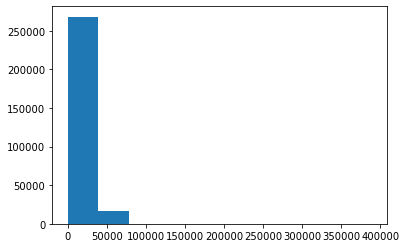

In [25]:
from matplotlib import pyplot as plt

plt.hist( tabelle["Preis"] )
plt.show()

Na das war ja nicht sehr hilfreich. Die wenigen Ausreißer / Angebote mit hohen Preisen machen uns das Histogramm kaputt. Also gleich nochmal: dieses Mal schränken wir die Preise noch so ein, dass wir als Maximalpreis genau den Preis nehmen, so dass 95% der Autos dabei sind:

In [26]:
verkaufspreis = tabelle["Preis"].quantile(0.95)
verkaufspreis

39991.0

In [27]:
autos_typische_verkaufspreise = tabelle[ tabelle["Preis"] < verkaufspreis ]

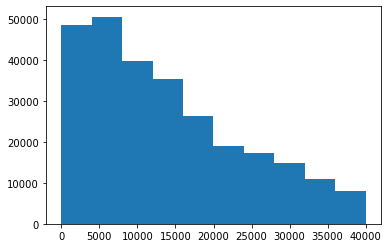

In [28]:
plt.hist( autos_typische_verkaufspreise["Preis"] )
plt.show()

Wir können die Unterteilung jetzt noch feiner machen:

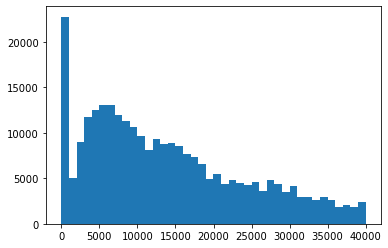

In [29]:
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40 )
plt.show()

Man sieht, dass die meisten gebrauchten Autos anscheinend für unter $1000 gehandelt werden.

Jetzt wäre es noch schön, das Histogramm-Diagramm hübscher zu machen, z.B., dass man die einzelnen Balken der Häufigkeiten klar unterscheiden kann:

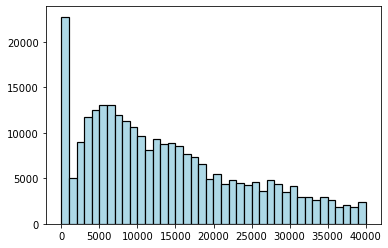

In [36]:
plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
         color="lightblue" )
plt.show()

Das Diagramm könnte noch verbessert werden:
- größer
- Achsen beschriften
- Titel

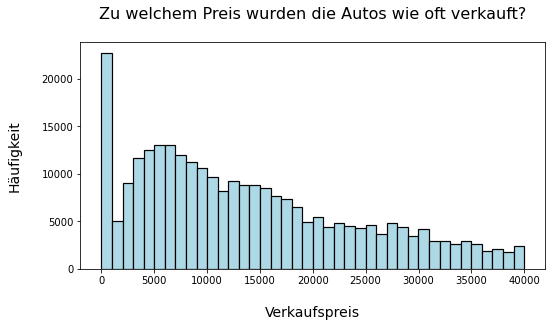

In [64]:
figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(600*px, 300*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Schön wäre auch noch ein Gitter mit Hilfslinien zum besser Ablesen der Werte:

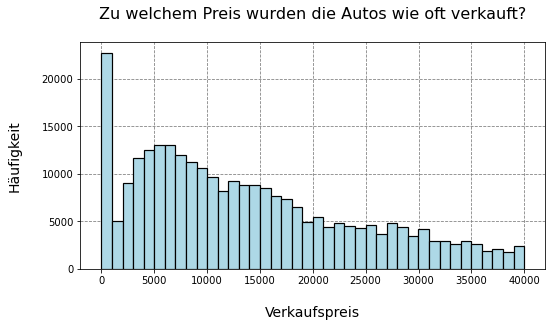

In [72]:
figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(600*px, 300*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

axis = plt.gca()
axis.set_axisbelow(True)
plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Die Anzahl und die genauen Stellen der Gitterhilfslinien können folgendermaßen definiert werden:

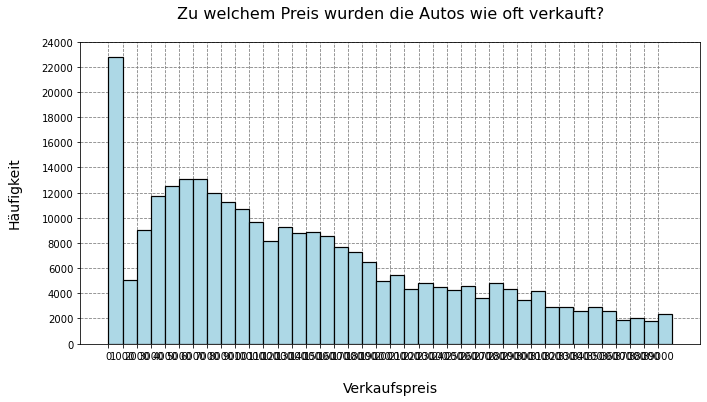

In [92]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Jetzt haben wir viel mehr Hilfslinien, aber auch ein neues Problem: die Beschriftungen der Ticks auf der horizontalen Achse überlappen sich!

[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000]
[0, '', '', '', '', 5000, '', '', '', '', 10000, '', '', '', '', 15000, '', '', '', '', 20000, '', '', '', '', 25000, '', '', '', '', 30000, '', '', '', '', 35000, '', '', '', '']


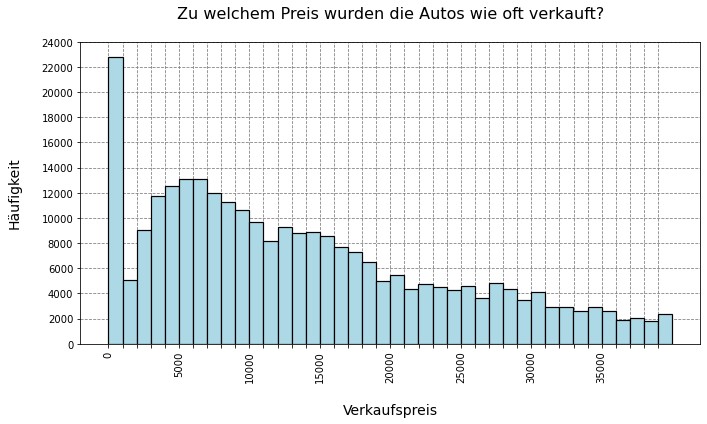

In [102]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightblue" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

print(x_ticks)
x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")
print(x_tick_labels)

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)
plt.show()

Ein tolles Diagramm! Jetzt wollen wir es abspeichern.

x_ticks:  [    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000]
x_tick_labels:  [0, '', '', '', '', 5000, '', '', '', '', 10000, '', '', '', '', 15000, '', '', '', '', 20000, '', '', '', '', 25000, '', '', '', '', 30000, '', '', '', '', 35000, '', '', '', '']


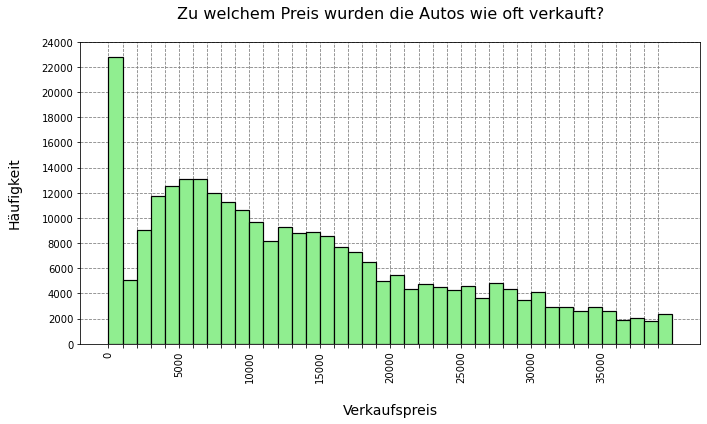

In [106]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightgreen" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

print("x_ticks: ", x_ticks)
x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")
print("x_tick_labels: ", x_tick_labels)

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

Jetzt wäre es toll, wenn der Mittelwert noch im Diagramm eingezeichnet wäre, z.B. als Linie:

In [107]:
autos_typische_verkaufspreise["Preis"]

0          4900
1          2000
2         19500
3         29590
4         39990
          ...  
285872     5300
285873    14995
285874    17895
285875    17900
285876     1300
Name: Preis, Length: 271300, dtype: int64

In [108]:
autos_typische_verkaufspreise["Preis"].mean()

13868.411481754516

Es gibt in der deskriptiven Statistik aber auch noch andere *Lageparameter*, v.a. den Median:

In [110]:
autos_typische_verkaufspreise["Preis"].median()

11900.0

Zum Unterschied Mittelwert vs. Median:

In [116]:
daten = np.array( [1,2,3,4, 5, 6,7,8,9] )

In [121]:
np.mean( daten )

5.0

In [122]:
np.median( daten )

5.0

In [123]:
daten2 = np.array( [1,2,3,4, 5, 6,7,80000,9] )

In [124]:
np.mean( daten2 )

8893.0

In [125]:
np.median( daten2 )

5.0

Der Mittelwert ist also anfällig für Ausreißer, der Median nicht. Daher nehmen wir jetzt den Median:

In [131]:
verkaufspreis_median = autos_typische_verkaufspreise["Preis"].median()
verkaufspreis_median

11900.0

x_ticks:  [    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000]
x_tick_labels:  [0, '', '', '', '', 5000, '', '', '', '', 10000, '', '', '', '', 15000, '', '', '', '', 20000, '', '', '', '', 25000, '', '', '', '', 30000, '', '', '', '', 35000, '', '', '', '']


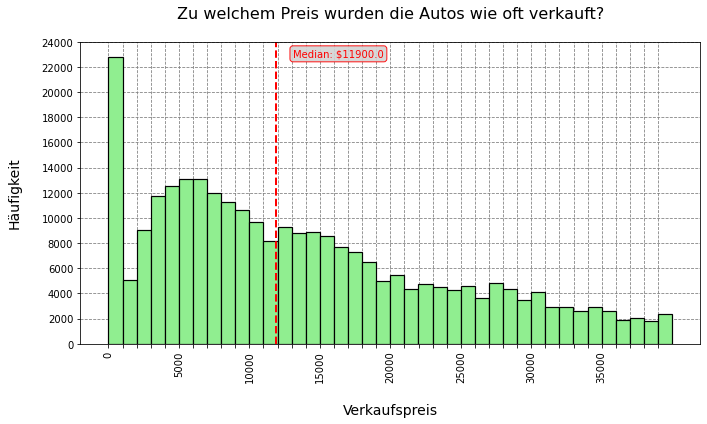

In [148]:
import numpy as np

figure = plt.gcf()

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
figure.set_size_inches(800*px, 400*px)

plt.hist( autos_typische_verkaufspreise["Preis"], bins=40, edgecolor='black', linewidth=1.2,
          color="lightgreen" )

ax = plt.gca()
ax.set_axisbelow(True)

x_ticks = np.arange(0, 40000, 1000)
y_ticks = np.arange(0, 25000, 2000)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

print("x_ticks: ", x_ticks)
x_tick_labels = []
for x in x_ticks:
    if x % 5000 == 0:
        x_tick_labels.append(x)
    else:
        x_tick_labels.append("")
print("x_tick_labels: ", x_tick_labels)

ax.set_xticklabels( x_tick_labels, rotation=90 )

plt.grid(linestyle="--", color="gray")

plt.xlabel("\nVerkaufspreis", fontsize=14)
plt.ylabel("Häufigkeit\n", fontsize=14)
plt.title("Zu welchem Preis wurden die Autos wie oft verkauft?\n", fontsize=16)

plt.axvline(verkaufspreis_median, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='lightgray', edgecolor="red", alpha=0.9)
plt.text(verkaufspreis_median*1.1, max_ylim*0.95,
         'Median: ${:.1f}'.format(verkaufspreis_median),
         bbox=props, color="red")

plt.savefig("verkaufspreis_histogramm.pdf", transparent=False)
plt.show()

